In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.display import display

#nice defaults for matplotlib
from matplotlib import rcParams

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

In [6]:
text = """4 threads, size 1000: 0.160238981247 sec
4 threads, size 2000: 1.16567397118 sec
4 threads, size 3000: 3.97460699081 sec
4 threads, size 4000: 9.42164921761 sec
4 threads, size 5000: 18.620071888 sec
4 threads, size 6000: 32.4379148483 sec
4 threads, size 7000: 51.2206640244 sec
4 threads, size 8000: 76.3854219913 sec
4 threads, size 9000: 109.64320302 sec
4 threads, size 10000: 148.324056149 sec
8 threads, size 1000: 0.101027011871 sec
8 threads, size 2000: 0.645831108093 sec
8 threads, size 3000: 2.14266896248 sec
8 threads, size 4000: 5.31043481827 sec
8 threads, size 5000: 10.5584039688 sec
8 threads, size 6000: 18.4110069275 sec
8 threads, size 7000: 28.4007570744 sec
8 threads, size 8000: 42.58842206 sec
8 threads, size 9000: 60.7886309624 sec
8 threads, size 10000: 82.9688959122 sec
12 threads, size 1000: 0.10795378685 sec
12 threads, size 2000: 0.731027126312 sec
12 threads, size 3000: 2.49887990952 sec
12 threads, size 4000: 4.35556602478 sec
12 threads, size 5000: 8.25915694237 sec
12 threads, size 6000: 16.7056269646 sec
12 threads, size 7000: 23.1413350105 sec
12 threads, size 8000: 40.8864350319 sec
12 threads, size 9000: 46.0834200382 sec
12 threads, size 10000: 64.4385859966 sec
16 threads, size 1000: 0.0739750862122 sec
16 threads, size 2000: 0.384780883789 sec
16 threads, size 3000: 1.64014291763 sec
16 threads, size 4000: 3.03565192223 sec
16 threads, size 5000: 7.54419183731 sec
16 threads, size 6000: 13.5466399193 sec
16 threads, size 7000: 25.6563909054 sec
16 threads, size 8000: 32.4418959618 sec
16 threads, size 9000: 53.5121119022 sec
16 threads, size 10000: 71.1846859455 sec
20 threads, size 1000: 0.0662169456482 sec
20 threads, size 2000: 0.320749998093 sec
20 threads, size 3000: 1.07472896576 sec
20 threads, size 4000: 3.71562314034 sec
20 threads, size 5000: 8.72728395462 sec
20 threads, size 6000: 15.4299590588 sec
20 threads, size 7000: 25.4059000015 sec
20 threads, size 8000: 33.1887440681 sec
20 threads, size 9000: 45.5679430962 sec
20 threads, size 10000: 61.052323103 sec
24 threads, size 1000: 0.329419136047 sec
24 threads, size 2000: 0.402347803116 sec
24 threads, size 3000: 1.27077078819 sec
24 threads, size 4000: 3.50228714943 sec
24 threads, size 5000: 8.9104590416 sec
24 threads, size 6000: 17.452466011 sec
24 threads, size 7000: 23.6016049385 sec
24 threads, size 8000: 32.7868609428 sec
24 threads, size 9000: 42.8466501236 sec
24 threads, size 10000: 56.8669600487 sec
28 threads, size 1000: 0.0554039478302 sec
28 threads, size 2000: 0.363894939423 sec
28 threads, size 3000: 1.18490695953 sec
28 threads, size 4000: 3.09955501556 sec
28 threads, size 5000: 8.23548102379 sec
28 threads, size 6000: 14.7956819534 sec
28 threads, size 7000: 27.7793958187 sec
28 threads, size 8000: 31.7125008106 sec
28 threads, size 9000: 42.947660923 sec
28 threads, size 10000: 74.6007530689 sec
32 threads, size 1000: 0.0938580036163 sec
32 threads, size 2000: 0.333749055862 sec
32 threads, size 3000: 1.06662797928 sec
32 threads, size 4000: 3.30076813698 sec
32 threads, size 5000: 8.01222395897 sec
32 threads, size 6000: 14.9744150639 sec
32 threads, size 7000: 28.8299548626 sec
32 threads, size 8000: 37.2356510162 sec
32 threads, size 9000: 57.5632560253 sec
32 threads, size 10000: 61.6759531498 sec
36 threads, size 1000: 0.0871248245239 sec
36 threads, size 2000: 0.322070837021 sec
36 threads, size 3000: 1.02866911888 sec
36 threads, size 4000: 2.78489899635 sec
36 threads, size 5000: 10.1535749435 sec
36 threads, size 6000: 18.9073791504 sec
36 threads, size 7000: 33.8680460453 sec
36 threads, size 8000: 49.3500640392 sec
36 threads, size 9000: 57.7160978317 sec
36 threads, size 10000: 75.3025121689 sec
1 thread, size 1000: 0.323858976364 sec
1 thread, size 2000: 2.54974079132 sec
1 thread, size 3000: 8.82381081581 sec
1 thread, size 4000: 21.2585411072 sec
1 thread, size 5000: 41.5803639889 sec
1 thread, size 6000: 71.7350990772 sec
1 thread, size 7000: 113.394227028 sec
1 thread, size 8000: 169.40498805 sec
1 thread, size 9000: 240.427263975 sec
1 thread, size 10000: 329.007373095 sec"""

In [7]:
text_split = text.split('\n')
clean = lambda x: tuple([float(i) for i in x.replace(' threads, ', ',').replace('thread, ', ',').replace('size ', '').replace(': ', ',').replace(' sec', '').split(',') if i])
times = map(clean, text_split)
data = pd.DataFrame(times)
data.columns = ['Num Threads', 'Array Size', 'Time (Seconds)']

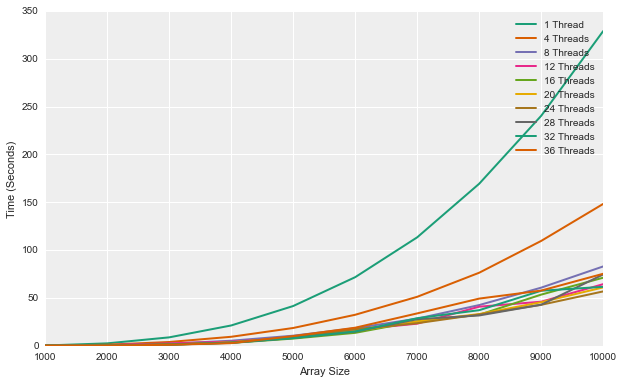

In [21]:
for nthreads in ([1] + range(4, 40, 4)):
    subset = data[data['Num Threads'] == nthreads]
    plt.plot(subset['Array Size'], subset['Time (Seconds)'], label="{} Thread{}".format(nthreads, "s" if nthreads > 1 else ""))
plt.legend()
plt.xlabel('Array Size')
plt.ylabel('Time (Seconds)')
plt.show()